[1842.0, -10.9, -5.6, -4.8, 1.3, 10.7, 15.0, 19.7, 16.8, 10.6, 2.1, -1.3, -6.6, 3.9]
[-10.9  -5.6  -4.8   1.3  10.7  15.   19.7  16.8  10.6   2.1  -1.3  -6.6]


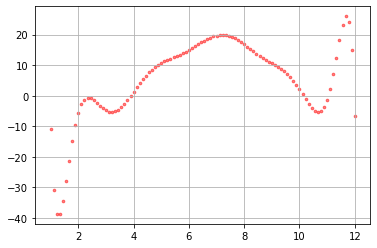

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1*1; p2=p2*1   
            else: 
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z

with open('10_NN.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)

    data = {}
    for line in csv_reader:
        key = int(line[0])
        #valuess = list(float(line[1].replace(',','.')),float(line[2].replace(',','.')),float(line[3].replace(',','.')))
        data[key] = []
        mean = 0
        for cnt, val1 in enumerate(line):
            val = float(val1.replace(',','.'))
            if val != 999.9:
                mean = (mean+val)/(cnt+1) 
                data[key].append(val)
            else:
                data[key].append(mean)




print(data[1842])

x=np.array([1,2,3,4,5,6,7,8,9,10,11,12], dtype=float)
y=np.array(data[1842][1:-1], dtype=float)
print(y)
xnew=np.linspace(np.min(x),np.max(x),100)
ynew=[lagranz(x,y,i) for i in xnew]

plt.scatter(xnew,ynew,s=7, c='red', marker="o", alpha = 0.5)
plt.grid(True)
plt.show()